# Домашнее задание 6 - временные ряды

__Оценки-баллы__: 
- 1: 1
- 2: 2
- 3: 3-4
- 4: 5-6
- 5: 7-9
- 6: 10-12
- 7: 13-14
- 8: 15-16
- 9: 17
- 10: 18-30

__DL (срок сдачи ДЗ)__: 22.12.2021 22:00. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw12_14_ivanov_i_i.ipynb

In [1]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = sm.datasets.macrodata.load_pandas().data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Вам представлены квартальные макроэкономические данные США. В датасете представлен ВВП, его компоненты (совокупный доход, потребление и инвестиции), а также прочие показатели. Задача - спрогнозировать ВВП Америки на 8 кварталов вперёд. Метрика - MAPE. Все гипотезы тестируются на уровне значимости 5%

### Задание 1 [5]

Приведите в порядок переменную, отвечающую за время и преобразуйте её в формат pandas datetime с квартальной периодичностью. Визуализируйте ряд ВВП. Какие характерные паттерны вы наблюдаете?

In [2]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [3]:
data['year2'] = data['year'].astype(int)
data['quarter'] = data['quarter'].astype(int).astype(str)

In [4]:
import datetime

In [5]:
data['quarter2'] = data['quarter'].map('Q{}'.format)

In [6]:
data['year2'] = data['year2'].astype(str) + data['quarter2']

In [7]:
data['year'] = pd.to_datetime(data['year2']).dt.to_period('Q')

In [8]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,year2,quarter2
0,1959Q1,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,1959Q1,Q1
1,1959Q2,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,1959Q2,Q2
2,1959Q3,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,1959Q3,Q3
3,1959Q4,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,1959Q4,Q4
4,1960Q1,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,1960Q1,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008Q3,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,2008Q3,Q3
199,2008Q4,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,2008Q4,Q4
200,2009Q1,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,2009Q1,Q1
201,2009Q2,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,2009Q2,Q2


### Задание 2 [15]

Определите порядок интеграции ряда ВВП с помощью формальных тестов. В случае противоречий ADF и KPSS-теста, полагайтесь на KPSS-тест. Постройте наивную модель и посчитайте метрику MAPE

In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [25]:
data = data.set_index('year')

In [26]:
data['realgdp']

year
1959Q1     2710.349
1959Q2     2778.801
1959Q3     2775.488
1959Q4     2785.204
1960Q1     2847.699
            ...    
2008Q3    13324.600
2008Q4    13141.920
2009Q1    12925.410
2009Q2    12901.504
2009Q3    12990.341
Freq: Q-DEC, Name: realgdp, Length: 203, dtype: float64

In [27]:
y = data['realgdp']

In [11]:
adfuller(y, regression='c', autolag='AIC') #maxlag = 5

(1.7504627967647186,
 0.9982455372335032,
 12,
 190,
 {'1%': -3.4652439354133255,
  '10%': -2.574944653739612,
  '5%': -2.8768752281673717},
 2034.517123668382)

In [12]:
kpss(y, regression='c')

(1.3362157311954894,
 0.01,
 15,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [15]:
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccf41465d0>)

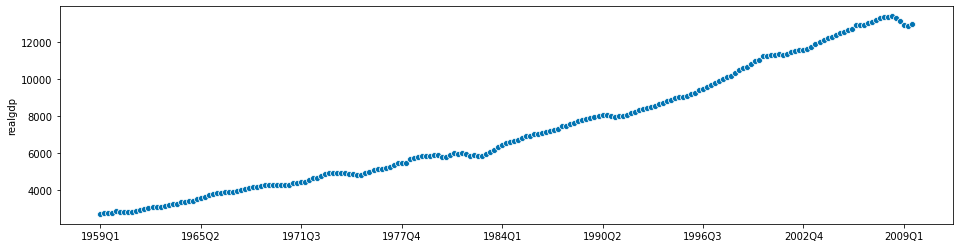

In [28]:
plot_series(y)

195 8


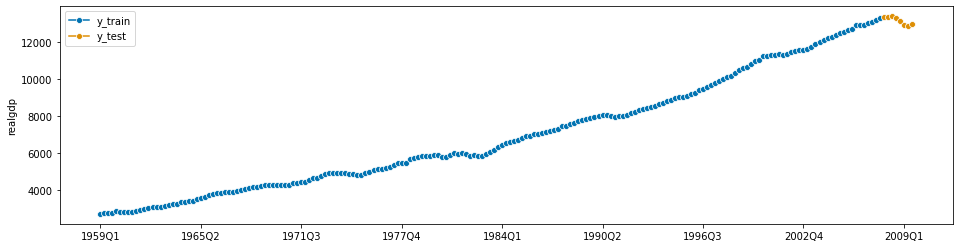

In [30]:
# Разбиение данных на обучение и контроль.

from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size = 8)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [32]:
# Чтобы прогнозы корректно индексировались, заведём отдельную переменную с индексами-датами.

from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(y_test.index, is_relative = False)
fh

ForecastingHorizon(['2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1',
             '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC', is_relative=False)

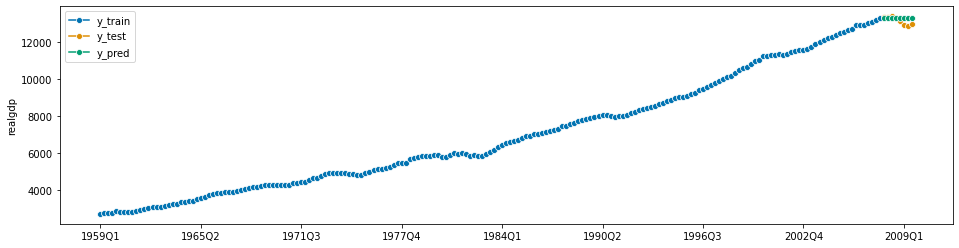

In [70]:
# Можно построить наивный прогноз с помощью разных стратегий. 
# Например, как среднее за последние window_length наблюдений.

from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="mean", window_length=1)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [43]:
import numpy as np

In [41]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [71]:
mape(y_pred, y_test)

1.4439535402044965

### Задание 3 [10]*

Для ряда ВВП подберите оптимальную ARIMA-модель и посчитайте метрику MAPE

In [ ]:
! pip install pmdarima

In [74]:
import pmdarima as pm

In [75]:
arima_model_y = pm.auto_arima(
    
    y_train,
    start_p=1, start_q=1,
    max_p=5, max_q=5, 
    
    seasonal=True, m = 7,
    start_P=0, start_Q=0,
    max_P = 2, max_Q = 2,
    
    max_D=2, max_d=2,
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',    
    
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=False, 
    n_fits=100,
    information_criterion='bic',
    out_of_sample_size=7
)

 ARIMA(0,2,0)(0,0,0)[7]             : BIC=2149.686, Time=0.10 sec
 ARIMA(0,2,0)(0,0,1)[7]             : BIC=2154.984, Time=0.40 sec
 ARIMA(0,2,0)(0,0,2)[7]             : BIC=2160.247, Time=0.66 sec
 ARIMA(0,2,0)(1,0,0)[7]             : BIC=2154.984, Time=0.24 sec
 ARIMA(0,2,0)(1,0,1)[7]             : BIC=2160.223, Time=0.74 sec
 ARIMA(0,2,0)(1,0,2)[7]             : BIC=2165.489, Time=1.54 sec
 ARIMA(0,2,0)(2,0,0)[7]             : BIC=2160.206, Time=0.27 sec
 ARIMA(0,2,0)(2,0,1)[7]             : BIC=2165.480, Time=0.59 sec
 ARIMA(0,2,0)(2,0,2)[7]             : BIC=2169.566, Time=1.93 sec
 ARIMA(0,2,1)(0,0,0)[7]             : BIC=2079.477, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[7]             : BIC=2081.580, Time=0.23 sec
 ARIMA(0,2,1)(0,0,2)[7]             : BIC=2085.613, Time=0.60 sec
 ARIMA(0,2,1)(1,0,0)[7]             : BIC=2082.146, Time=0.21 sec
 ARIMA(0,2,1)(1,0,1)[7]             : BIC=2086.025, Time=0.38 sec
 ARIMA(0,2,1)(1,0,2)[7]             : BIC=2090.856, Time=0.79 sec
 ARIMA(0,2

In [76]:
arima_model_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  195
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1026.975
Date:                Sun, 26 Dec 2021   AIC                           2061.950
Time:                        14:01:36   BIC                           2075.001
Sample:                             0   HQIC                          2067.235
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2044      0.071      2.888      0.004       0.066       0.343
ar.L2          0.2019      0.061      3.328      0.001       0.083       0.321
ma.L1         -0.9696      0.019    -51.012      0.000      -1.007      -0.932
sigma2      2392.3393    193.657     12.353      0.000    2012.778    2771.900
===================================================================================
Ljung-Box (Q):                       36.34   Jarque-Bera (JB):                10.05
Prob(Q):                              0.64   Prob(JB):                         0.01
Heteroskedasticity (H):               1.82   Skew:                             0.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
z_pred, z_pred_ci = arima_model_y.predict(
    n_periods=8, 
    return_conf_int=True, 
    alpha=0.05
)

mape(z_pred, y_test)

3.7799543570353555

---
---